### 开始

In [1]:
# 检查Python版本
from sys import version_info
if version_info.major != 3:
    
    raise Exception('请使用Python3来完成此项目')

### 探索数据集

###  训练集

#### 收集图片信息

In [4]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

train_folder = 'train'
train_imgs_info = []
for img in tqdm(os.listdir(train_folder)):
    info = cv2.imread(os.path.join(train_folder, img))
    train_imgs_info.append((info.shape, img))

100%|██████████| 25000/25000 [00:49<00:00, 504.81it/s]


In [5]:
train_imgs_info[:2]

[((500, 499, 3), 'dog.2120.jpg'), ((233, 166, 3), 'dog.6766.jpg')]

#### 分辨率分布

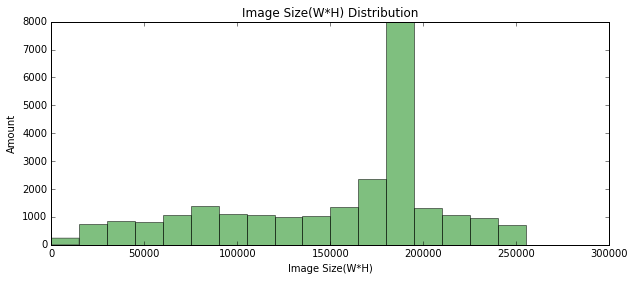

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
img_size = [info[0][0]*info[0][1] for info in train_imgs_info]
plt.title("Image Size(W*H) Distribution")
plt.xlabel('Image Size(W*H)')
plt.ylabel('Amount')
plt.hist(img_size, bins = 20, alpha = 0.5, range = (0, 300000), color = 'g', label = 'image_size')
plt.show()

#### 训练集样本展示

In [7]:
# def show_pics(folder, file_names):
#     plt.figure(figsize=(12, 10))
    
#     for i, file in enumerate(file_names):
#         img = plt.imread(os.path.join(folder, file))
#         plt.subplot(3, 4, i+1)
#         plt.title(file.split('.')[0])
#         plt.axis('on')
#         plt.imshow(img)
        
#         plt.show()

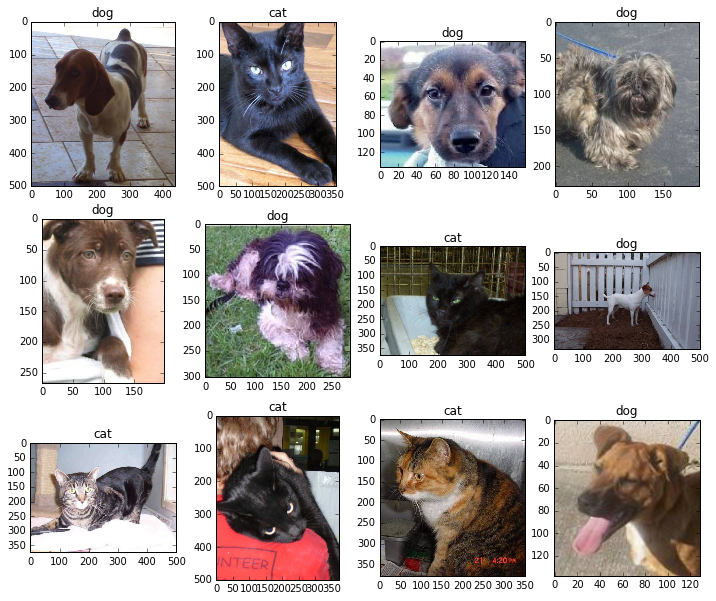

In [31]:
import random

plt.figure(figsize=(12, 10))
file_list = os.listdir(train_folder)
sample_files = random.sample(file_list, 12)
for i, file in enumerate(sample_files):
    img = plt.imread(os.path.join(train_folder, file))
    plt.subplot(3, 4, i+1)
    plt.title(file.split('.')[0])
    plt.axis('on')
    plt.imshow(img)

plt.show()
# show_pics(train_folder, sample_files)

###  预测结果可视化

[5413, 8170, 3670, 7611, 2608, 6949, 7027, 9392, 7705, 5835, 4008, 12092]


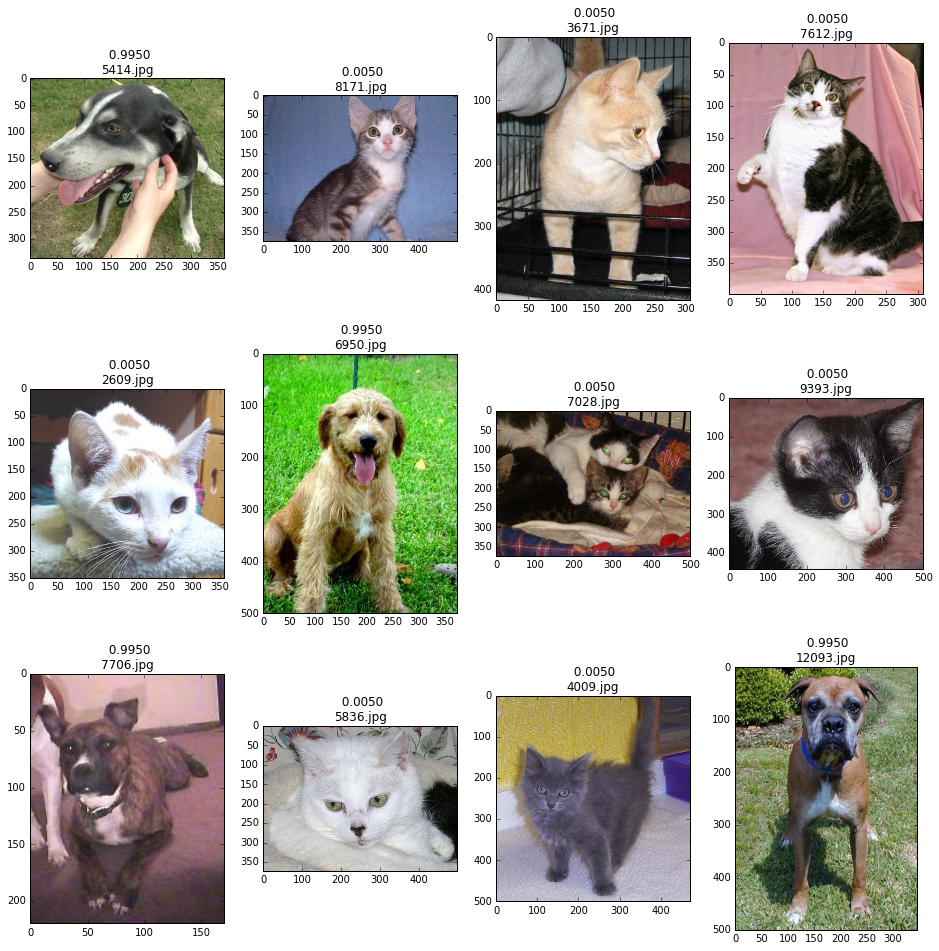

In [40]:
import pandas as pd
from keras.preprocessing.image import *

test_folder = 'test/'
df = pd.read_csv("Composite_Model_pred.csv")

# preds_rate = shuffle(df['label'], random_state=2018)
# P = P[P < 0.8]
# P = P[P > 0.2]

pred_samples_id = random.sample(list(df['id']), 12)

print(pred_samples_id)

plt.figure(figsize=(16, 16))

for i, id in enumerate(pred_samples_id):
    img = plt.imread(os.path.join(test_folder, str(id)+'.jpg'))
    plt.subplot(3, 4, i+1)
    p_rate = df['label'][id-1]
    plt.title(' {:.4f}'.format(p_rate) + '\n' + str(id+1)+'.jpg')
    plt.axis('on')
    plt.imshow(img)

plt.show()

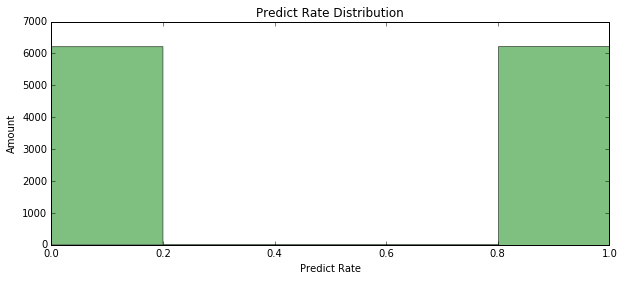

In [46]:
import math
import numpy as np

preds_rate = df['label']

plt.figure(figsize=(10, 4))

plt.title("Predict Rate Distribution")
plt.xlabel('Predict Rate')
plt.ylabel('Amount')
plt.hist(preds_rate, bins = 5, alpha = 0.5, range = (0, 1.0), color = 'g', label = 'rate')
plt.show()